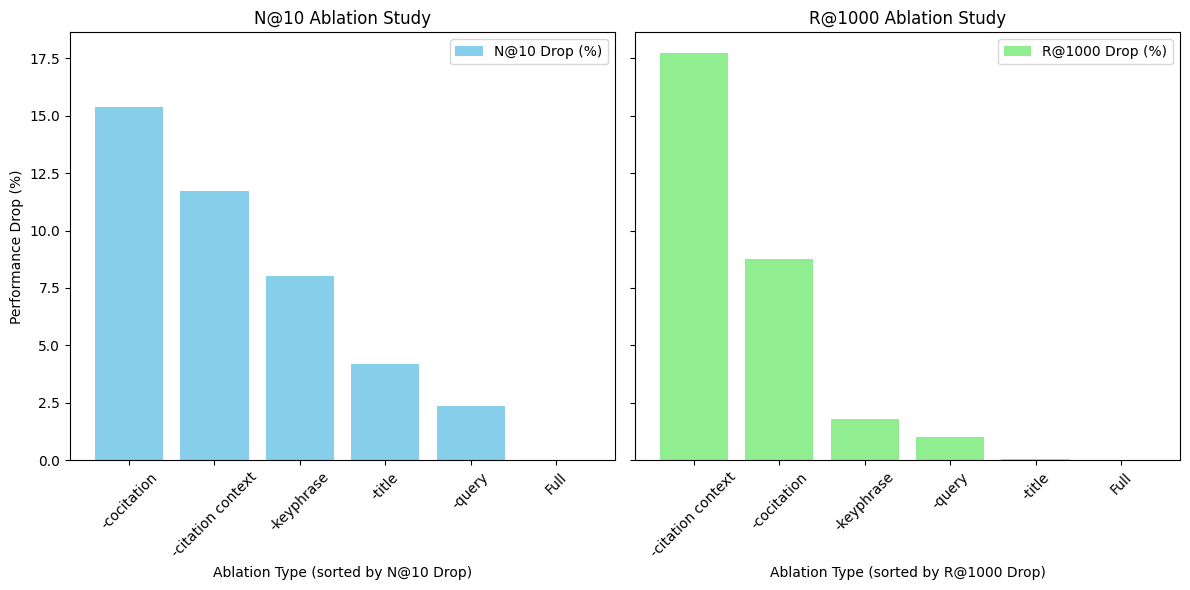

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
ablation_types = ['Full', '-keyphrase', '-cocitation', '-title', '-query', '-citation context']
n_at_10 = [40.21111111, 36.98888889, 34.03333333, 38.53333333, 39.26666667, 35.5]
r_at_1000 = [76.66666667, 75.28888889, 69.94444444, 76.62222222, 75.88888889, 63.06666667]

# Calculate performance drop (%) compared to 'Full'
n_at_10_drop = [0 if i == 0 else ((n_at_10[0] - x) / n_at_10[0]) * 100 for i, x in enumerate(n_at_10)]
r_at_1000_drop = [0 if i == 0 else ((r_at_1000[0] - x) / r_at_1000[0]) * 100 for i, x in enumerate(r_at_1000)]

# Combine data with ablation types and sort by performance drop
n_data = list(zip(n_at_10_drop, ablation_types))
r_data = list(zip(r_at_1000_drop, ablation_types))
n_data.sort(reverse=True)  # Sort N@10 drop in descending order
r_data.sort(reverse=True)  # Sort R@1000 drop in descending order

n_at_10_sorted, ablation_types_sorted_n = zip(*n_data)
r_at_1000_sorted, ablation_types_sorted_r = zip(*r_data)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar width and positions
bar_width = 0.8
index = np.arange(len(ablation_types))

# Create histograms
ax1.bar(index, n_at_10_sorted, bar_width, color='skyblue', label='N@10 Drop (%)')
ax2.bar(index, r_at_1000_sorted, bar_width, color='lightgreen', label='R@1000 Drop (%)')

# Customize the plots
ax1.set_xlabel('Ablation Type (sorted by N@10 Drop)')
ax1.set_ylabel('Performance Drop (%)')
ax1.set_title('N@10 Ablation Study')
ax1.set_xticks(index)
ax1.set_xticklabels(ablation_types_sorted_n, rotation=45)
ax1.legend()

ax2.set_xlabel('Ablation Type (sorted by R@1000 Drop)')
ax2.set_title('R@1000 Ablation Study')
ax2.set_xticks(index)
ax2.set_xticklabels(ablation_types_sorted_r, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()